In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import VarianceThreshold

### load dermatology dataset

In [2]:
df=pd.read_csv('dermatology.csv')
df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


### preprocessing

In [3]:
df.isna().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [4]:
df.age.values

array([55.,  8., 26., 40., 45., 41., 18., 57., 22., 30., 20., 21., 22.,
       10., 65., 40., 30., 38., 23., 17.,  8., 51., 42., 44., 22., 33.,
       10., 17., 43., 50., 50., 10., 34., nan, nan, nan, nan, 15., 26.,
       46., 51., 62., 15., 35., 30., 48., 46., 12., 52., 60., 32., 35.,
       41., 48., 51., 19., 22., 29., 25., 33.,  8., 40., 33., 42., 36.,
       60., 36., 21., 40., 21., 34., 13., 52., 48., 17., 25., 33., 62.,
       52., 27., 40., 31., 27., 10., 55., 30., 42., 48., 22., 31., 50.,
       43., 30., 42., 22., 18., 35., 60., 28., 13., 20., 64., 43., 20.,
       34., 39., 60., 38., 44., 36., 41., 18., 39., 40., 47., 16., 27.,
       52., 25.,  0., 33., 46.,  7., 30., 29., 23.,  8., 44., 17., 16.,
       55., 40., 34., 29., 34., 25., 70., 37., 41., 32., 20., 19., 61.,
       27., 36., 40., 52., 27., 30., 45., 34., 27., 46., 52., 28., 40.,
       55., 32., 33., 47., 35., 61., 22., 10., 20., 55., 67., 51., 20.,
       22., 45., 55., 56., 18., 40., 30., 33., 40., 42., 36., 27

In [5]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
age_imp=pd.DataFrame(imp.fit_transform(np.array(df.age).reshape(-1,1)))

In [6]:
df.age=age_imp

In [7]:
df.isna().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [12]:
df.groupby('class').count()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age
class,,,,,,,,,,,,,,,,,,,,,
1,112,112,112,112,112,112,112,112,112,112,...,112,112,112,112,112,112,112,112,112,112
2,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
3,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
4,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
5,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
6,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


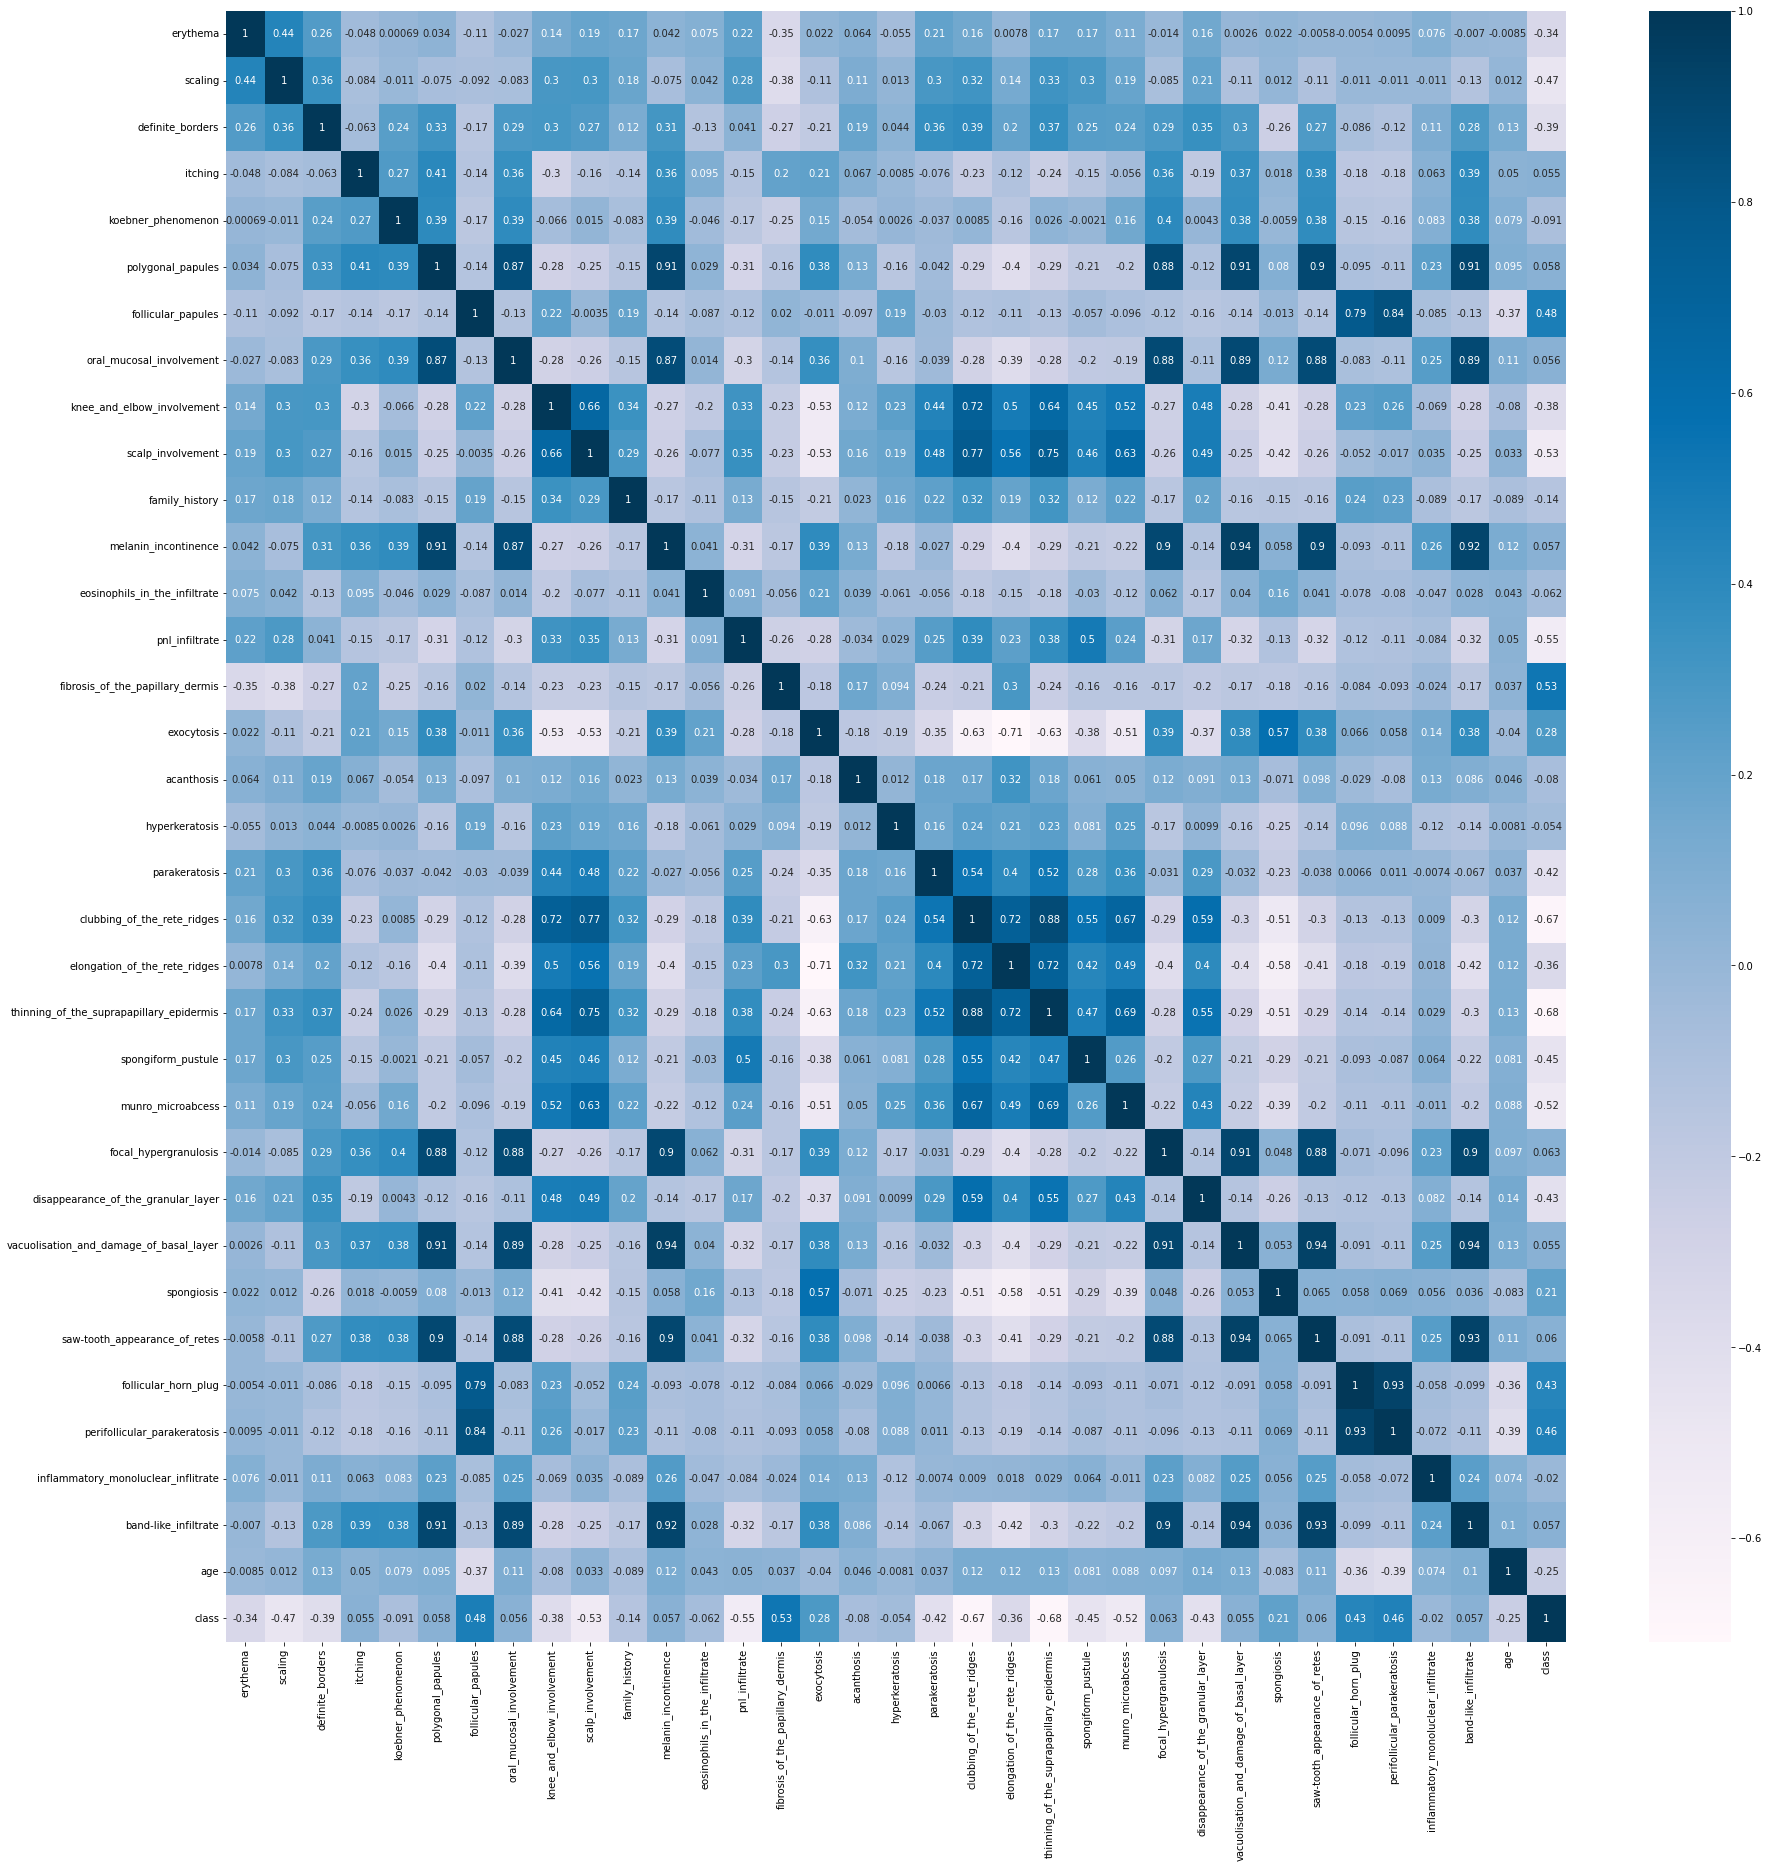

In [20]:
fig, ax = plt.subplots(figsize=(30,30))     

sns.heatmap(df.corr() , annot=True, cmap=plt.cm.PuBu,ax=ax)
plt.show()

In [22]:
x=df.drop(columns=['class'])
y=df['class']

In [23]:
x.shape

(366, 34)

In [24]:
from sklearn.feature_selection import VarianceThreshold
select=VarianceThreshold(threshold=0)
x=select.fit_transform(x)

In [25]:
x.shape

(366, 34)

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)

### train test split

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=15)

# model no1 :XGBoost model

In [29]:
from sklearn.model_selection import GridSearchCV
PARAMETERS = {
              "max_depth":[ 5, 10],
              "min_child_weight":[2,10],
              "learning_rate":[0.01, 0.1],
              "n_estimators":[100,200]}
xgb_model = xgb.XGBClassifier()
model_gs = GridSearchCV(xgb_model,param_grid=PARAMETERS,cv=3,scoring="accuracy")
model_gs.fit(xtrain,ytrain)

print(model_gs.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 100}


In [30]:
xgb_model = xgb.XGBClassifier(learning_rate= 0.1, max_depth= 5, min_child_weight=2,n_estimators= 100)

In [31]:
xgb_model.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [32]:
from sklearn.metrics import accuracy_score,classification_report
ypred = xgb_model.predict(xtest)
print(accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

0.972972972972973
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00        11
           3       1.00      0.86      0.92        14
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         6

    accuracy                           0.97        74
   macro avg       0.98      0.98      0.97        74
weighted avg       0.98      0.97      0.97        74



In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(xtrain)
X_test_reduced = pca.transform(xtest)

In [34]:
xgb_model.fit(X_train_reduced, ytrain)
ypred_pca= xgb_model.predict(X_test_reduced)
print(accuracy_score(ytest, ypred_pca))
print(classification_report(ytest, ypred_pca))

0.7567567567567568
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.47      0.75      0.58        12
           2       1.00      1.00      1.00        11
           3       0.62      0.36      0.45        14
           4       0.79      0.73      0.76        15
           5       0.67      0.67      0.67         6

    accuracy                           0.76        74
   macro avg       0.76      0.75      0.74        74
weighted avg       0.77      0.76      0.75        74



In [ ]:
"""
result:
    PCA on this dataset and with XGBoost model has bad affect and reduce the accuracy
"""

# grid search:

---------------------------------------------------------------------------
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Model: Perceptron()
Accuracy: %90.75
MSE: 0.25675675675675674
Recall: 0.8513513513513513
Precision: 0.9256756756756757
F1-Score: 0.8574938574938574
Best Estimator: Perceptron(penalty='elasticnet')
---------------------------------------------------------------------------
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END leaf_size=30, metric=euclidean, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=18, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=18, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=18, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=18, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=18, weight

Model: RandomForestClassifier()
Accuracy: %95.9
MSE: 0.5
Recall: 0.9054054054054054
Precision: 0.9300476947535772
F1-Score: 0.9058063106039118
Best Estimator: RandomForestClassifier(max_features=10, min_samples_split=50, n_estimators=300)
---------------------------------------------------------------------------
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn

[CV] END leaf_size=30, metric=minkowski, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=8, weights=distance; t

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are

Model: LogisticRegression()
Accuracy: %97.95
MSE: 0.16216216216216217
Recall: 0.9594594594594594
Precision: 0.9604989604989606
F1-Score: 0.9595195195195195
Best Estimator: LogisticRegression(C=0.23357214690901212)
---------------------------------------------------------------------------
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END ....................alpha=0.1, loss=log, penalty=l1; total time=   0.0s
[CV] END ....................alpha=0.1, loss=log, penalty=l1; total time=   0.0s
[CV] END ....................alpha=0.1, loss=log, penalty=l1; total time=   0.0s
[CV] END ....................alpha=0.1, loss=log, penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l2; total time=   0.0s
[CV] END .................................penalty=elasticnet; total time=   0.0s
[CV] END bootstrap=True, max_features=1, min_samples_split=50, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_features=1, min_samples_split=5

[CV] END ....................C=78.47599703514607, penalty=l2; total time=   0.1s
[CV] END ....................C=78.47599703514607, penalty=l2; total time=   0.1s
[CV] END ....................C=78.47599703514607, penalty=l2; total time=   0.1s
[CV] END ....................C=78.47599703514607, penalty=l2; total time=   0.2s
[CV] END ....................C=545.5594781168514, penalty=l2; total time=   0.2s
[CV] END ....................C=545.5594781168514, penalty=l2; total time=   0.1s
[CV] END ..................C=545.5594781168514, penalty=none; total time=   0.1s
[CV] END ..................C=545.5594781168514, penalty=none; total time=   0.2s
[CV] END ....................C=3792.690190732246, penalty=l1; total time=   0.0s
[CV] END ....................C=3792.690190732246, penalty=l1; total time=   0.0s
[CV] END ....................C=3792.690190732246, penalty=l1; total time=   0.0s
[CV] END ....................C=3792.690190732246, penalty=l2; total time=   0.2s
[CV] END ..................C

[CV] END leaf_size=1, metric=minkowski, n_neighbors=6, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, weights=distance; tota

[CV] END leaf_size=10, metric=minkowski, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=16, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=16, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=16, weights=

[CV] END leaf_size=30, metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=16, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=16, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=16, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=16, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=16, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=16, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=16, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=16, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=16, weights=

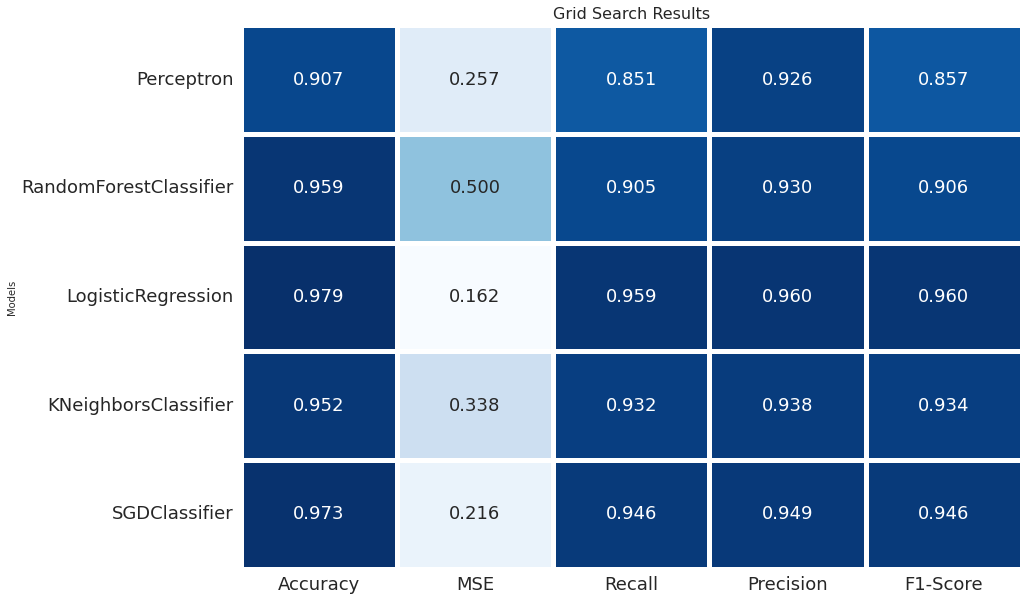

In [47]:
classifier = [
             Perceptron(),
             RandomForestClassifier(),
             LogisticRegression(),
             KNeighborsClassifier(),
             SGDClassifier()]
perceptron_param_grid={'penalty':['l2','elasticnet']}

rf_param_grid = {"max_features": [1,10],
                "min_samples_split":[50],
                "bootstrap":[True],
                "n_estimators":[100,300]}


logreg_param_grid = {"C":np.logspace(-4, 4, 20),
                    "penalty": ["l1","l2","none"]}

knn_param_grid = {"n_neighbors": np.linspace(2,20,12, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan","minkowski"],
                 "leaf_size": [1,10,30]}

sgdc_param_grid = {
    "loss" : ["log"],
    "alpha" : [0.0001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"]}



classifier_param = [perceptron_param_grid,
               
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid,
                   sgdc_param_grid]

cv_result = []
best_estimators = []
mean_squared_errors = []
roc_auc_scores = []
recall_scores = []
precision_scores = []
f1_scores = []


for i in range(len(classifier)):
    print("---------------------------------------------------------------------------")
    clf = GridSearchCV(classifier[i],
                       param_grid=classifier_param[i],
                       cv = StratifiedKFold(n_splits = 5),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2)
    
    clf.fit(xtrain,ytrain)
    
    cv_result.append(clf.best_score_)
    
    mean_squared_errors.append(mean_squared_error(ytest,clf.predict(xtest)))
    
    recall_scores.append(recall_score(ytest, clf.predict(xtest), average='weighted'))
    
    precision_scores.append(precision_score(ytest, clf.predict(xtest), average='weighted'))
    
    f1_scores.append(f1_score(ytest, clf.predict(xtest), average='weighted'))
    
    best_estimators.append(clf.best_estimator_)
    
    print("Model: {}".format(classifier[i]))
    print("Accuracy: %{}".format(round(cv_result[i]*100,2)))
    print("MSE: {}".format(mean_squared_errors[i]))
    print("Recall: {}".format(recall_scores[i]))
    print("Precision: {}".format(precision_scores[i]))
    print("F1-Score: {}".format(f1_scores[i]))
    print("Best Estimator: {}".format(clf.best_estimator_))
    
print("---------------------------------------------------------------------------")

sns.set_style("darkgrid")
cv_results = pd.DataFrame({"Accuracy":cv_result,
                           "MSE":mean_squared_errors,
                           "Recall": recall_scores,
                           "Precision": precision_scores,
                           "F1-Score":f1_scores,
                           "Models":[
                                    'Perceptron',
                                   "RandomForestClassifier",
                                     "LogisticRegression",
                                     "KNeighborsClassifier",
                                     "SGDClassifier"
                                   ]})

cv_results.index = cv_results["Models"]

cv_results  = cv_results.drop(["Models"], axis = 1)

f,ax = plt.subplots(figsize=(14,10))

sns.heatmap(cv_results, annot=True,cmap = "Blues",fmt= '.3f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 18})

plt.xticks(size = 18)
plt.yticks(size = 18, rotation = 0)
plt.ylabel("Models")
plt.title("Grid Search Results", size = 16)
plt.show()

In [48]:
best_estimators

[Perceptron(penalty='elasticnet'),
 RandomForestClassifier(max_features=10, min_samples_split=50, n_estimators=300),
 LogisticRegression(C=0.23357214690901212),
 KNeighborsClassifier(leaf_size=1, metric='manhattan', weights='distance'),
 SGDClassifier(loss='log', penalty='none')]

# grid search with PCA

---------------------------------------------------------------------------
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END leaf_size=30, metric=euclidean, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END leaf_size=30, 

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_scor

Model: RandomForestClassifier()
Accuracy: %80.51
MSE: 2.1621621621621623
Recall: 0.6756756756756757
Precision: 0.655270477851123
F1-Score: 0.6377943238408353
Best Estimator: RandomForestClassifier(max_features=1, min_samples_split=50)
---------------------------------------------------------------------------
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=10, weights=

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

[CV] END leaf_size=30, metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=6, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=6, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=6, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=6, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=6, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=6, weights=distance; t

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Model: LogisticRegression()
Accuracy: %80.51
MSE: 1.8918918918918919
Recall: 0.7297297297297297
Precision: 0.7845199419368217
F1-Score: 0.7336024336024336
Best Estimator: LogisticRegression(C=10000.0)
---------------------------------------------------------------------------
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END .................alpha=0.0001, loss=log, penalty=l1; total time=   0.0s
[CV] END .................alpha=0.0001, loss=log, penalty=l1; total time=   0.0s
[CV] END .................alpha=0.0001, loss=log, penalty=l1; total time=   0.0s
[CV] END ...................alpha=0.01, loss=log, penalty=l1; total time=   0.0s
[CV] END ...................alpha=0.01, loss=log, penalty=l1; total time=   0.0s
[CV] END .................alpha=0.01, loss=log, penalty=none; total time=   0.0s
[CV] END .................alpha=0.01, loss=log, penalty=none; total time=   0.0s
[CV] END ....................alpha=0.1, loss=log, penalty=l2; total time=   0.0s
[CV] END ..

[CV] END .................C=0.004832930238571752, penalty=l2; total time=   0.1s
[CV] END .................C=0.004832930238571752, penalty=l2; total time=   0.1s
[CV] END .................C=0.004832930238571752, penalty=l2; total time=   0.1s
[CV] END .................C=0.004832930238571752, penalty=l2; total time=   0.1s
[CV] END .................C=0.004832930238571752, penalty=l2; total time=   0.1s
[CV] END ...............C=0.004832930238571752, penalty=none; total time=   0.1s
[CV] END ...............C=0.004832930238571752, penalty=none; total time=   0.1s
[CV] END ..................C=0.08858667904100823, penalty=l2; total time=   0.1s
[CV] END ..................C=0.08858667904100823, penalty=l2; total time=   0.1s
[CV] END ..................C=0.08858667904100823, penalty=l2; total time=   0.1s
[CV] END ................C=0.08858667904100823, penalty=none; total time=   0.1s
[CV] END ................C=0.08858667904100823, penalty=none; total time=   0.1s
[CV] END ................C=0

[CV] END leaf_size=1, metric=euclidean, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=20, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=20, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=euclidean, n_neighbors=20, weights=uniform; tota

[CV] END leaf_size=1, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=18, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=20, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=20, weights=uniform; to

[CV] END leaf_size=10, metric=euclidean, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=5, weights=distance; t

[CV] END leaf_size=10, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=6, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=6, weights=uniform; to

[CV] END leaf_size=30, metric=euclidean, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=

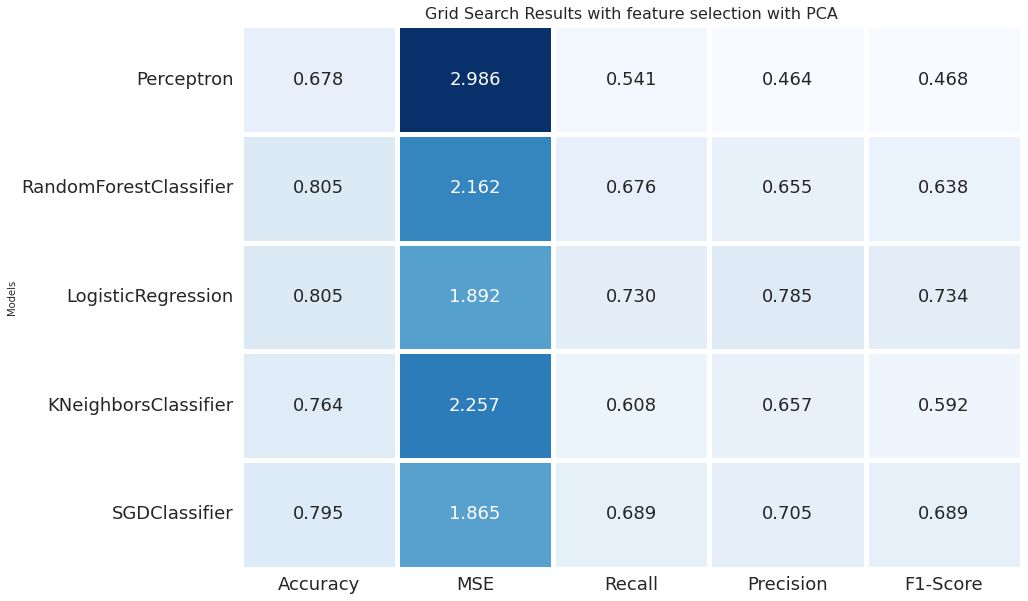

In [45]:
classifier = [
             Perceptron(),
             RandomForestClassifier(),
             LogisticRegression(),
             KNeighborsClassifier(),
             SGDClassifier()]
perceptron_param_grid={'penalty':['l2','elasticnet']}

rf_param_grid = {"max_features": [1,10],
                "min_samples_split":[50],
                "bootstrap":[True],
                "n_estimators":[100,300]}


logreg_param_grid = {"C":np.logspace(-4, 4, 20),
                    "penalty": ["l1","l2","none"]}

knn_param_grid = {"n_neighbors": np.linspace(2,20,12, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan","minkowski"],
                 "leaf_size": [1,10,30]}

sgdc_param_grid = {
    "loss" : ["log"],
    "alpha" : [0.0001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"]}



classifier_param = [perceptron_param_grid,
               
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid,
                   sgdc_param_grid]

cv_result = []
best_estimators = []
mean_squared_errors = []
roc_auc_scores = []
recall_scores = []
precision_scores = []
f1_scores = []


for i in range(len(classifier)):
    print("---------------------------------------------------------------------------")
    clf = GridSearchCV(classifier[i],
                       param_grid=classifier_param[i],
                       cv = StratifiedKFold(n_splits = 5),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2)
    
    clf.fit(X_train_reduced,ytrain)
    
    cv_result.append(clf.best_score_)
    
    mean_squared_errors.append(mean_squared_error(ytest,clf.predict(X_test_reduced)))
    
    recall_scores.append(recall_score(ytest, clf.predict(X_test_reduced), average='weighted'))
    
    precision_scores.append(precision_score(ytest, clf.predict(X_test_reduced), average='weighted'))
    
    f1_scores.append(f1_score(ytest, clf.predict(X_test_reduced), average='weighted'))
    
    best_estimators.append(clf.best_estimator_)
    
    print("Model: {}".format(classifier[i]))
    print("Accuracy: %{}".format(round(cv_result[i]*100,2)))
    print("MSE: {}".format(mean_squared_errors[i]))
    print("Recall: {}".format(recall_scores[i]))
    print("Precision: {}".format(precision_scores[i]))
    print("F1-Score: {}".format(f1_scores[i]))
    print("Best Estimator: {}".format(clf.best_estimator_))
    
print("---------------------------------------------------------------------------")

sns.set_style("darkgrid")
cv_results = pd.DataFrame({"Accuracy":cv_result,
                           "MSE":mean_squared_errors,
                           "Recall": recall_scores,
                           "Precision": precision_scores,
                           "F1-Score":f1_scores,
                           "Models":[
                                    'Perceptron',
                                   "RandomForestClassifier",
                                     "LogisticRegression",
                                     "KNeighborsClassifier",
                                     "SGDClassifier"
                                   ]})

cv_results.index = cv_results["Models"]

cv_results  = cv_results.drop(["Models"], axis = 1)

f,ax = plt.subplots(figsize=(14,10))

sns.heatmap(cv_results, annot=True,cmap = "Blues",fmt= '.3f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 18})

plt.xticks(size = 18)
plt.yticks(size = 18, rotation = 0)
plt.ylabel("Models")
plt.title("Grid Search Results with feature selection with PCA", size = 16)
plt.show()

In [46]:
best_estimators

[Perceptron(penalty='elasticnet'),
 RandomForestClassifier(max_features=1, min_samples_split=50),
 LogisticRegression(C=10000.0),
 KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=3),
 SGDClassifier(alpha=0.1, loss='log', penalty='none')]

In [ ]:
"""
the highest accuracy for this datset is for logisticReggression algorithm with 98% truth
and PCA is not good at all

"""

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

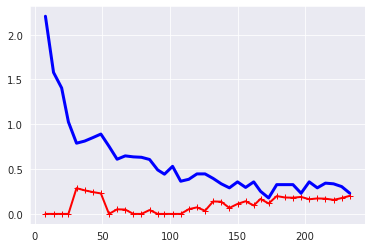

In [57]:
train_sizes, train_scores, valid_scores = learning_curve(
   LogisticRegression(C=0.23357214690901212), xtrain, ytrain, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

In [ ]:
"""
it shows tha test error is reduce by increasing the number of instances so our model is perform good and it is not overfitting
"""

In [55]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3,min_samples_split=10), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5
    )

ada_clf.fit(xtrain, ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         min_samples_split=10),
                   learning_rate=0.5, n_estimators=200)

In [56]:
y_pred_ada= ada_clf.predict(xtest)
accuracy_score(ytest, y_pred_ada)

0.9459459459459459

In [ ]:
"""
I want to run votting classifier algorithm on models those train with dimensionality reduction(PCA) instance
because theyre accuracy are low
"""

In [75]:
clf1=Perceptron(penalty='elasticnet')
clf2=RandomForestClassifier(max_features=1, min_samples_split=50)
clf3=LogisticRegression(C=10000.0)
clf4=KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=3)
clf5=SGDClassifier(alpha=0.1, loss='log', penalty='none')

In [76]:
vc=VotingClassifier(
    estimators=(('per', clf1), ('rf', clf2), ('lr', clf3),('knn',clf4),('sgd',clf5))
    ,voting='hard', n_jobs=-1)

In [77]:
vc.fit(X_train_reduced,ytrain)

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=(('per', Perceptron(penalty='elasticnet')),
                             ('rf',
                              RandomForestClassifier(max_features=1,
                                                     min_samples_split=50)),
                             ('lr', LogisticRegression(C=10000.0)),
                             ('knn',
                              KNeighborsClassifier(leaf_size=1,
                                                   metric='manhattan',
                                                   n_neighbors=3)),
                             ('sgd',
                              SGDClassifier(alpha=0.1, loss='log',
                                            penalty='none'))),
                 n_jobs=-1)

In [79]:
y_pred_vc= vc.predict(X_test_reduced)
accuracy_score(ytest, y_pred_vc)

0.6756756756756757

In [82]:
from sklearn.ensemble import StackingClassifier
s=StackingClassifier(estimators=[('per', clf1), ('rf', clf2), ('lr', clf3),('knn',clf4),('sgd',clf5)])

In [83]:
s.fit(X_train_reduced,ytrain)

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

StackingClassifier(estimators=[('per', Perceptron(penalty='elasticnet')),
                               ('rf',
                                RandomForestClassifier(max_features=1,
                                                       min_samples_split=50)),
                               ('lr', LogisticRegression(C=10000.0)),
                               ('knn',
                                KNeighborsClassifier(leaf_size=1,
                                                     metric='manhattan',
                                                     n_neighbors=3)),
                               ('sgd',
                                SGDClassifier(alpha=0.1, loss='log',
                                              penalty='none'))])

In [84]:
y_pred_s= s.predict(X_test_reduced)
accuracy_score(ytest, y_pred_s)

0.6891891891891891